# Dimensionality Reduction
In this notebook, I will go through a few tutorials on dimensionality reduction. The goal is to reduce the dimension of the color histograms that I have for several classes of image objects to visualize them.

## Scikit learn tutorial
The following tutorial can be found [here](http://scipy-lectures.github.io/packages/scikit-learn/index.html).

### Loading an example dataset

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [7]:
"""
150 observations of 4 features:
    - sepal length
    - sepal width
    - petal length
    - petal width
"""
print iris.data.shape

(150, 4)


In [10]:
"""
150 observations of flower subtype:
    - Iris setosa
    - Iris versicolor
    - Iris virginica
"""
print iris.target.shape

(150,)


In [29]:
import numpy as np

In [14]:
np.unique(iris.target)

array([0, 1, 2])

Let's also take a look at the digits dataset, consisting of 1797 images where each is an 8x8 pixel image representing a hand-written digit.

In [16]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [19]:
import pylab as pl
%matplotlib inline

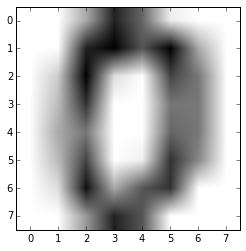

In [20]:
pl.imshow(digits.images[0], cmap=pl.cm.gray_r)

In [44]:
# Reshape each 8x8 image into a length 64 vector
data = digits.images.reshape((digits.images.shape[0], -1))

### Learning and predicting
We now want to learn from the training data and predict on new data. We can use `scikit-learn` to create an `estimator` and calling its `fit(X,Y)` method.

In [45]:
from sklearn import svm

In [47]:
# Creating a classifier
clf = svm.LinearSVC()
clf.fit(iris.data, iris.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [48]:
# Try to predict flower subtype from observations
clf.predict([[5.0, 3.6, 1.3, 0.25]])

array([0])

In [49]:
# Access model parameters via coefficients attribute
clf.coef_

array([[ 0.18423414,  0.4512283 , -0.80794686, -0.45071474],
       [ 0.05225425, -0.89361379,  0.40541216, -0.9392524 ],
       [-0.85071489, -0.98671713,  1.38095026,  1.86539077]])

### k-Nearest neighbors classifier
This is a very simple classifier where an observation is assigned the label that corresponds to the majority of its *k* nearest neighbors in *n*-dimensional space.

In [50]:
from sklearn import neighbors

In [51]:
# Create and fit a nearest-neighbor classifier
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [57]:
knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

In [61]:
perm = np.random.permutation(iris.target.size)
iris.data = iris.data[perm]
iris.target = iris.target[perm]

In [62]:
# Train on first 100 out of 150 observations
knn.fit(iris.data[:100], iris.target[:100])
# Test on observations 101-150
knn.score(iris.data[100:], iris.target[100:])

0.95999999999999996

### Support vector machines (SVM)

#### Linear SVMs
SVMs try to construct a hyperplane that maximizes the margin between two classes. It uses a subset of the input (observations closest to the hyperplane) called the support vectors.

In [63]:
svc = svm.SVC(kernel='linear')
svc.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Let's test this out on the digits dataset:

In [69]:
svc = svm.SVC(kernel='linear')
svc.fit(digits.data[:1600], digits.target[:1600])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:
svc.score(digits.data[1600:], digits.target[1600:])

0.949238578680203

#### Nonlinear SVMs (kernels)
Classes can't always be separated by hyperplanes, so we can also use nonlinear decision functions:

In [76]:
# Polynomial kernel
svc1 = svm.SVC(kernel='poly', degree=3)
svc1.fit(digits.data[:1600], digits.target[:1600])
svc1.score(digits.data[1600:], digits.target[1600:])

0.9441624365482234

In [77]:
# Radial basis function (RBF) kernel
svc2 = svm.SVC(kernel='rbf')
svc2.fit(digits.data[:1600], digits.target[:1600])
svc2.score(digits.data[1600:], digits.target[1600:])

0.40609137055837563

In the case of the handwritten digit classification, the linear SVM works better than the polynomial and RBF SVMs.

### K-means clustering
This algorithm divides the set into *k* clusters, assigning each observation to the cluster that minimizes the distance between that observation and the cluster mean. Then the cluster means are recomputed, and the observations reassigned. This is repeated until the clusters converge.

In [78]:
from sklearn import cluster

In [86]:
iris = datasets.load_iris()
k_means = cluster.KMeans(n_clusters=3, max_iter=300)
k_means.fit(iris.data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [87]:
print k_means.labels_[::10]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [88]:
print iris.target[::10]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


#### Application to image compression
Clustering is a way of choosing a small number of observations from the information. This can be used to "posterize" an image (conversion of continuous gradation of tone to several regions of fewer tones).

In [122]:
from scipy import misc
import matplotlib.pyplot as plt

In [101]:
lena = misc.lena().astype(np.float32)
print type(lena[1,1])
print lena.shape

<type 'numpy.float32'>
(512, 512)


In [106]:
X = lena.reshape((-1,1))
print X.shape
print type(X)

(262144, 1)
<type 'numpy.ndarray'>


In [130]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [131]:
# Put the cluster centroids into one vector
values = k_means.cluster_centers_.squeeze()
# Get the pixel cluster labels
labels = k_means.labels_

In [132]:
# For each pixel, set to nearest cluster centroid
lena_compressed = np.choose(labels, values)
# Reshape into original image size
lena_compressed.shape = lena.shape

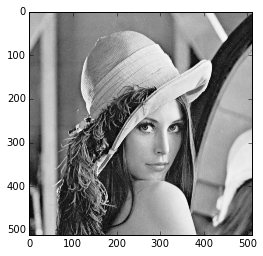

In [133]:
# Display original image
plt.imshow(lena, cmap=plt.cm.Greys_r)

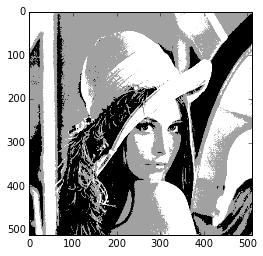

In [134]:
# Display quantized image
plt.imshow(lena_compressed, cmap=plt.cm.Greys_r)

### Dimesionality reduction w/ Principal Component Analysis (PCA)
Principal component analysis uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the original number of variables. [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

The first principal component has the largest possible variance (i.e., accounts for as much variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [135]:
from sklearn import decomposition

In [137]:
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)

PCA(copy=True, n_components=2, whiten=False)

In [138]:
X = pca.transform(iris.data)

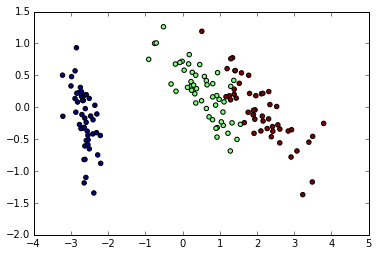

In [139]:
pl.scatter(X[:,0], X[:,1], c=iris.target)

## Manifold learning tutorial
The following tutorial can be found [here](http://scikit-learn.org/stable/modules/manifold.html).